In [303]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler



import pickle

import sys
sys.path.append("../")

import src.support as sp

import warnings
warnings.filterwarnings('ignore')

In [304]:
df = pd.read_csv("datos/creditcardmarketing.csv", header=None)

In [305]:
col = ["Customer_Number","Offer_Accepted","Reward","Mailer_Type","Income_Level","Bank_Accounts_Open","Overdraft_Protection","Credit_Rating","Credit_Cards_Held","Homes_Owned","Household_Size","Own_Your_Home","Average_Balance_Q1","Average_Balance_Q2","Average_Balance_Q3","Average_Balance_Q4","Balance"]

In [306]:
df.columns = col

## `Análisis exploratorio`

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   Bank_Accounts_Open    18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   Credit_Cards_Held     18000 non-null  int64  
 9   Homes_Owned           18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  Average_Balance_Q1    17976 non-null  float64
 13  Average_Balance_Q2    17976 non-null  float64
 14  Average_Balance_Q3    17976 non-null  float64
 15  Average_Balance_Q4 

In [308]:
df.isnull().sum() / df.shape[0] * 100

Customer_Number         0.000000
Offer_Accepted          0.000000
Reward                  0.000000
Mailer_Type             0.000000
Income_Level            0.000000
Bank_Accounts_Open      0.000000
Overdraft_Protection    0.000000
Credit_Rating           0.000000
Credit_Cards_Held       0.000000
Homes_Owned             0.000000
Household_Size          0.000000
Own_Your_Home           0.000000
Average_Balance_Q1      0.133333
Average_Balance_Q2      0.133333
Average_Balance_Q3      0.133333
Average_Balance_Q4      0.133333
Balance                 0.133333
dtype: float64

### `Variable respuesta`

In [309]:
df_counts = df.Offer_Accepted.value_counts().reset_index()
df_counts

,index,Offer_Accepted
0,No,16977
1,Yes,1023


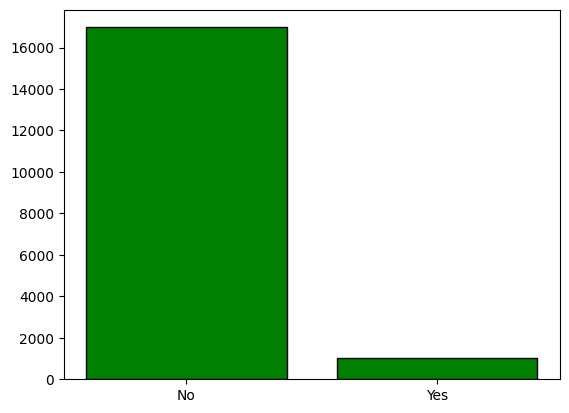

In [310]:
fig = plt.bar(df_counts["index"], df_counts["Offer_Accepted"], color="green", edgecolor="black")

### `Variables predictoras`

#### `Variables numéricas`

In [311]:
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [312]:
df2 = df.select_dtypes(include = np.number)

In [313]:
df_num = df2.drop(["Customer_Number", "Bank_Accounts_Open", "Credit_Cards_Held", "Homes_Owned",
                    "Household_Size"], axis=1)

In [314]:
df_num.head()

,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


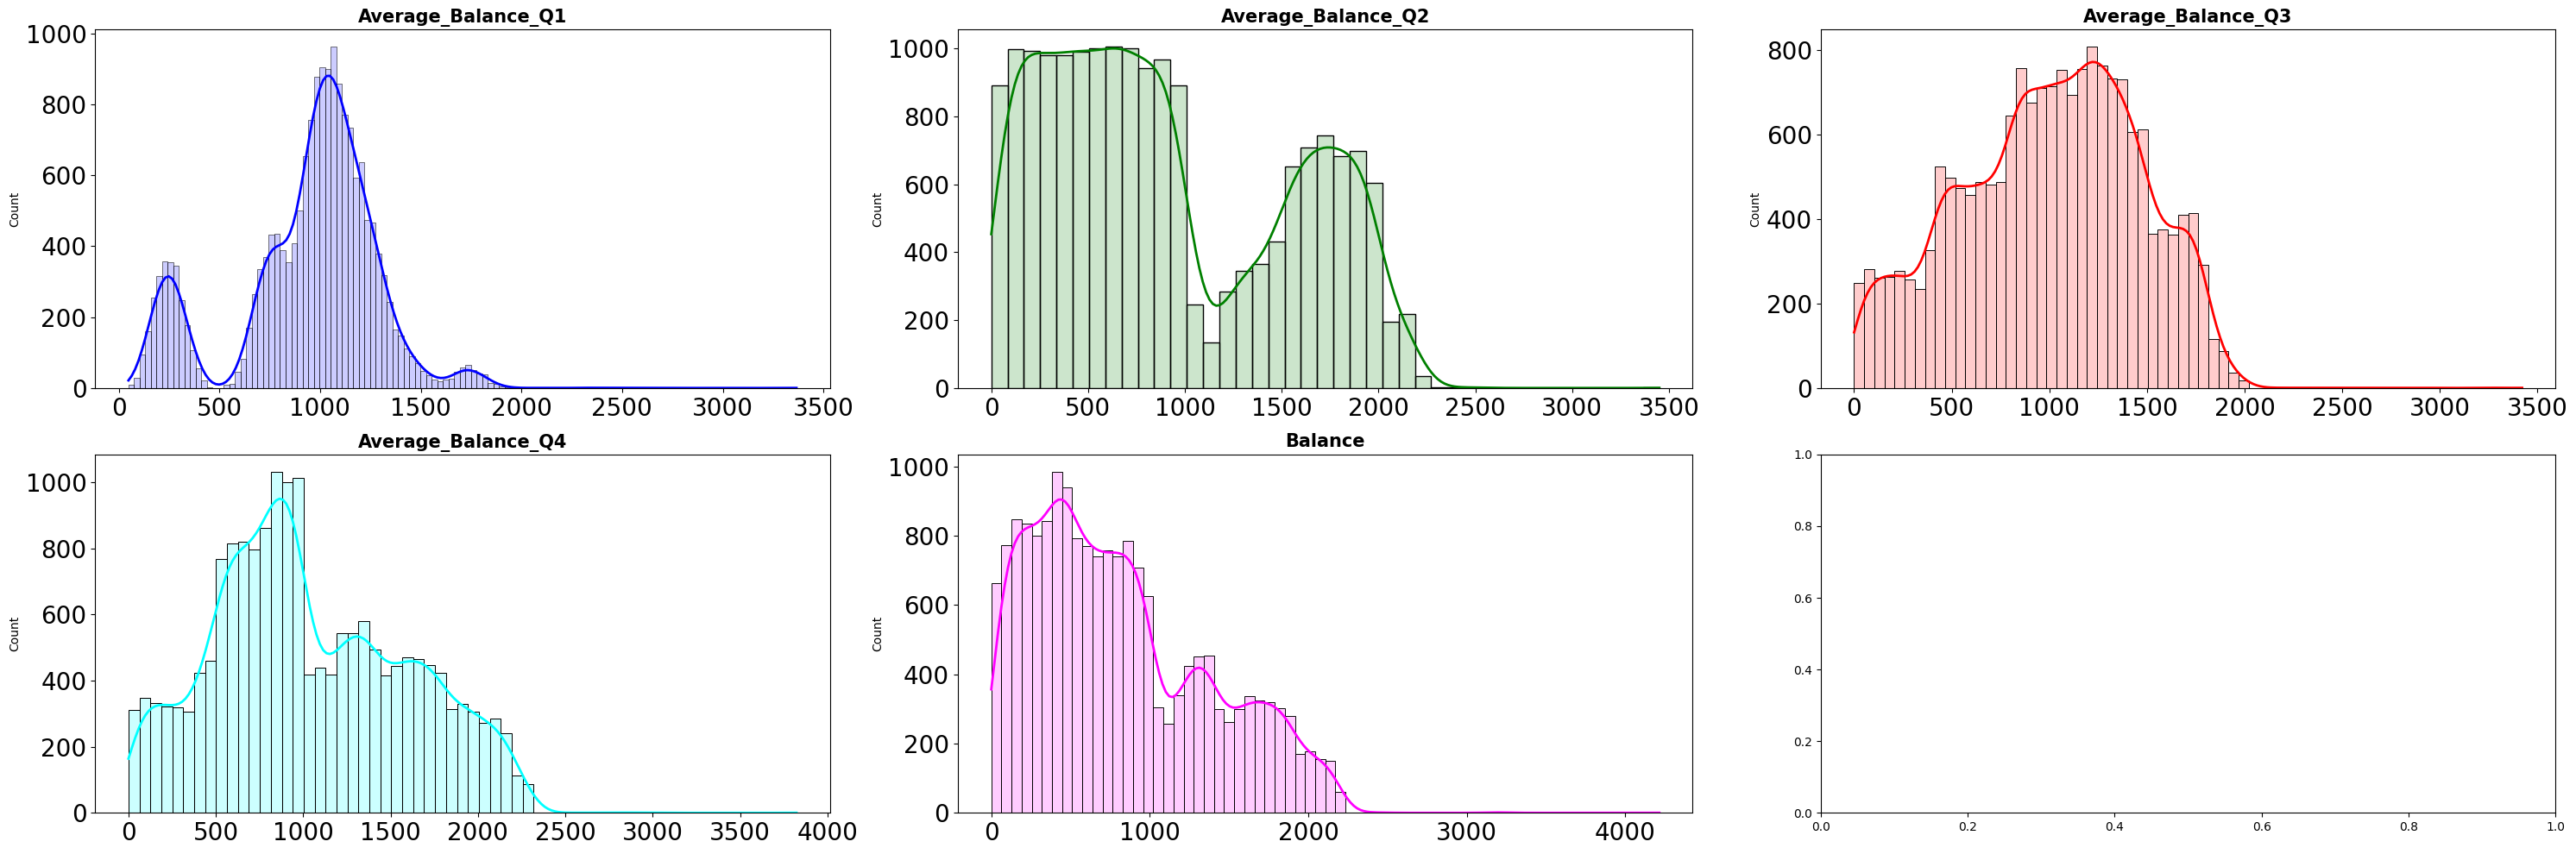

In [315]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_num.columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_num,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

#### `Variables categóricas`

In [316]:
df_cat = df.drop(["Customer_Number","Offer_Accepted", "Average_Balance_Q1", "Average_Balance_Q2", "Average_Balance_Q3", "Average_Balance_Q4", 
                  "Balance"], axis= 1)

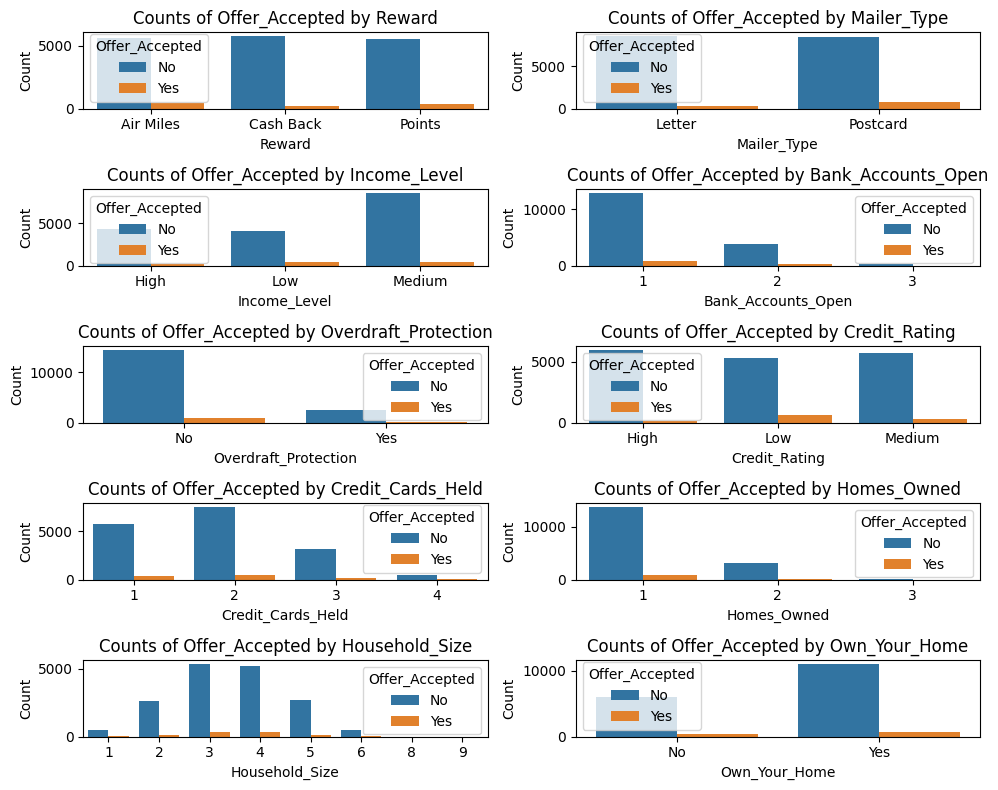

In [317]:
fig, axes = plt.subplots(5, 2, figsize=(10, 8))
axes = axes.flat
columnas_object = df_cat.columns
for i, colum in enumerate(columnas_object):
    counts = df.groupby([colum, "Offer_Accepted"]).size().reset_index(name="count")
    sns.barplot(x=colum, y="count", hue="Offer_Accepted", data=counts, ax=axes[i])
    axes[i].set_title(f"Counts of Offer_Accepted by {colum}")
    axes[i].set_xlabel(colum)
    axes[i].set_ylabel("Count")
fig.tight_layout()
plt.show()

### `Gestión de outliers`

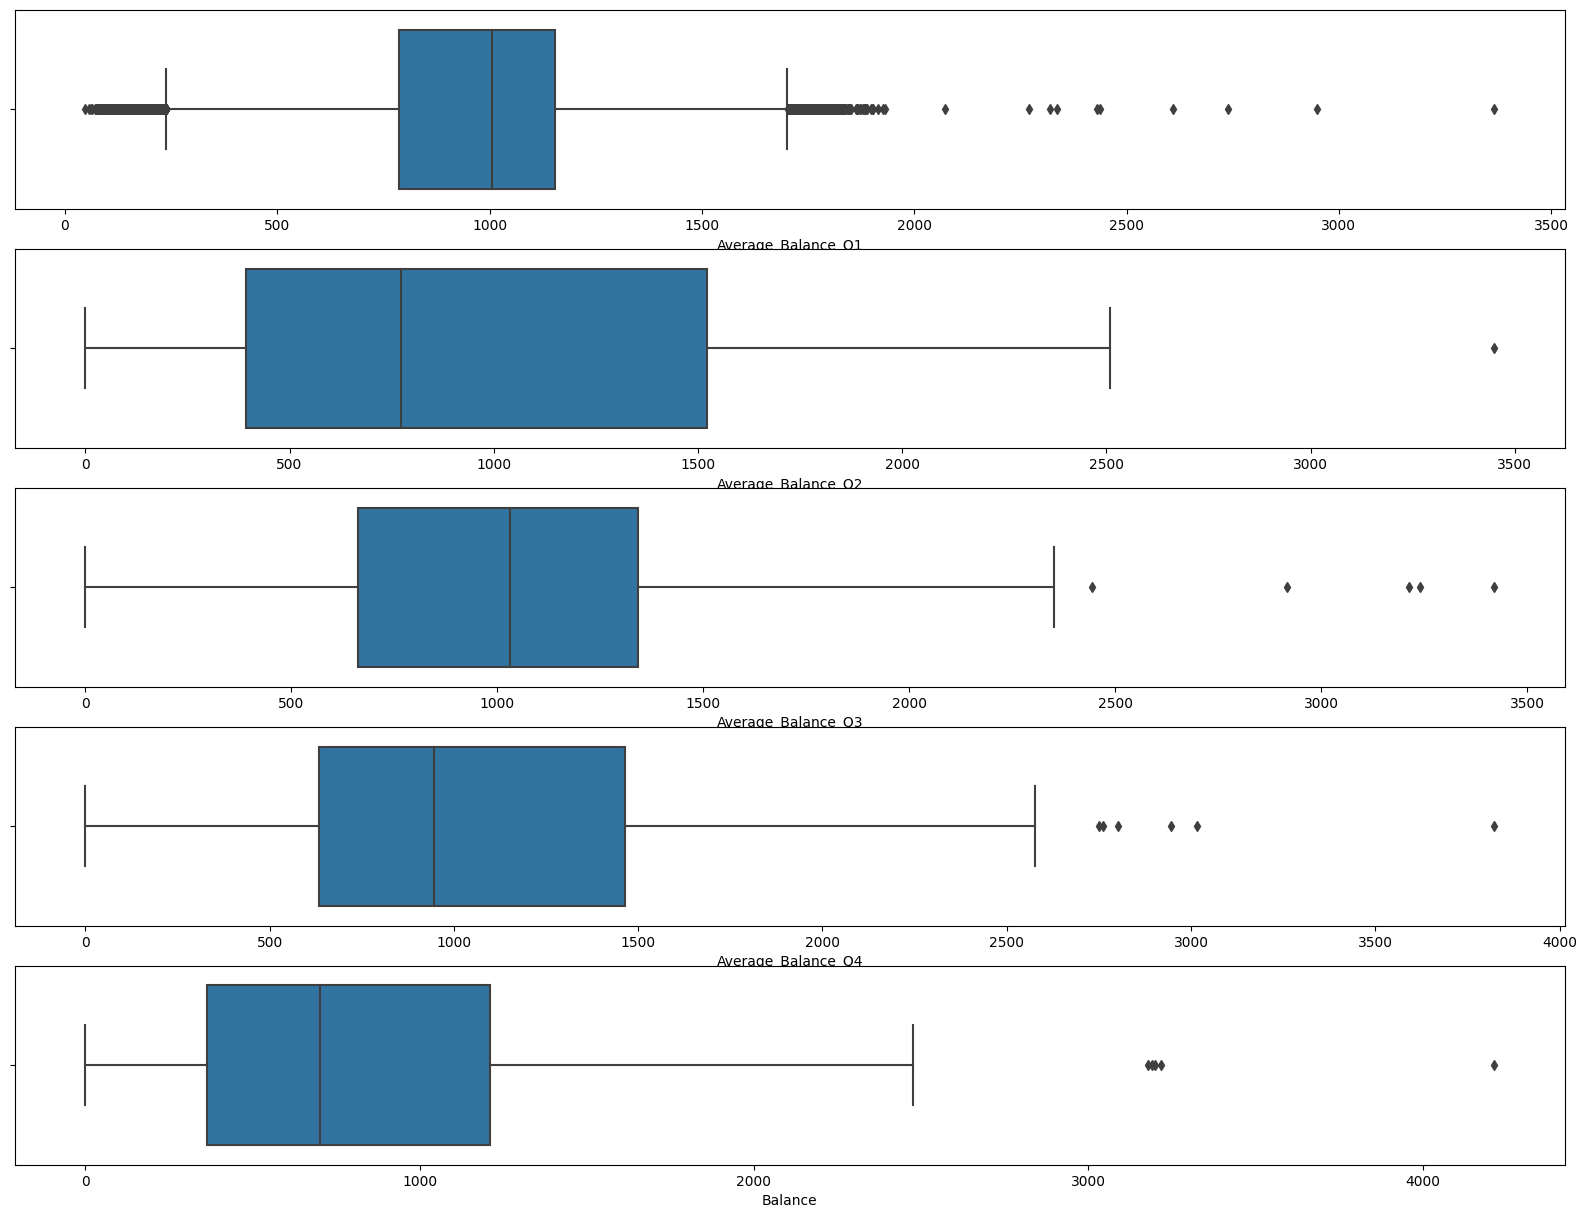

In [318]:
fig, ax = plt.subplots(5, 1, figsize=(20,15))

for i in range(len(df_num.columns)):
    sns.boxplot(x=df_num.columns[i], data=df_num, ax=ax[i])
plt.show()

In [319]:
dicc = sp.detectar_outliers(df_num.columns, df_num)

In [320]:
sp.sustituir_outliers(dicc, df)

### `Gestión de nulos`

In [321]:
df["Average_Balance_Q1"].replace(np.nan, df["Average_Balance_Q1"].median(), inplace = True)
df["Average_Balance_Q2"].replace(np.nan, df["Average_Balance_Q2"].median(), inplace = True)
df["Average_Balance_Q3"].replace(np.nan, df["Average_Balance_Q3"].median(), inplace = True)
df["Average_Balance_Q4"].replace(np.nan, df["Average_Balance_Q4"].median(), inplace = True)
df["Balance"].replace(np.nan, df["Balance"].median(), inplace = True)

### `Estandarización`

In [322]:
scaler = StandardScaler()
cols = ["Average_Balance_Q1", "Average_Balance_Q2", "Average_Balance_Q3", "Average_Balance_Q4", "Balance"]
scaler.fit(df[cols])
X_escaladas = scaler.transform(df[cols])
df[cols] = X_escaladas
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,0.666485,1.225233,-0.267404,0.097462,0.346024
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,0.095003,-1.406438,-1.959032,-1.745384,-0.795978
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,-2.620236,-0.876875,-1.419291,-1.623977,-1.018633
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,0.882998,1.078311,1.669960,0.140951,-0.700811
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,0.853262,1.985672,0.785750,-0.107299,-0.797774


In [323]:
import pickle

with open('datos/estandarizacion.pkl', 'wb') as s:
    pickle.dump(scaler, s)

### `Encoding`

In [324]:
df_cat_enc =df_cat.select_dtypes(include=object)

In [325]:
df_cat_enc.head()

,Reward,Mailer_Type,Income_Level,Overdraft_Protection,Credit_Rating,Own_Your_Home
0,Air Miles,Letter,High,No,High,No
1,Air Miles,Letter,Medium,No,Medium,Yes
2,Air Miles,Postcard,High,No,Medium,Yes
3,Air Miles,Letter,Medium,No,High,No
4,Air Miles,Letter,Medium,No,Medium,Yes


In [326]:
print('Reward has', df_cat_enc['Reward'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Mailer_Type has', df_cat_enc['Mailer_Type'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Income_Level has', df_cat_enc['Income_Level'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Overdraft_Protection has', df_cat_enc['Overdraft_Protection'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Credit_Rating has', df_cat_enc['Credit_Rating'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Own_Your_Home has', df_cat_enc['Own_Your_Home'].unique(), 'categories')

Reward has ['Air Miles' 'Cash Back' 'Points'] categories
---------------------------------------------------------------------------
Mailer_Type has ['Letter' 'Postcard'] categories
---------------------------------------------------------------------------
Income_Level has ['High' 'Medium' 'Low'] categories
---------------------------------------------------------------------------
Overdraft_Protection has ['No' 'Yes'] categories
---------------------------------------------------------------------------
Credit_Rating has ['High' 'Medium' 'Low'] categories
---------------------------------------------------------------------------
Own_Your_Home has ['No' 'Yes'] categories


In [327]:
orden_Income_Level = ["Medium", "Low", "High"]
orden_Overdraft_Protection = ["Yes", "No"]
orden_Own_Your_Home = ["No", "Yes"]

In [328]:
sp.ordinal_encoder(orden_Income_Level, df, "Income_Level")
sp.ordinal_encoder(orden_Overdraft_Protection, df, "Overdraft_Protection")
sp.ordinal_encoder(orden_Own_Your_Home, df, "Own_Your_Home")

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1,No,Air Miles,Letter,2,1,1,High,2,1,4,0,0.666485,1.225233,-0.267404,0.097462,0.346024
1,2,No,Air Miles,Letter,0,1,1,Medium,2,2,5,1,0.095003,-1.406438,-1.959032,-1.745384,-0.795978
2,3,No,Air Miles,Postcard,2,2,1,Medium,2,1,2,1,-2.620236,-0.876875,-1.419291,-1.623977,-1.018633
3,4,No,Air Miles,Letter,0,2,1,High,1,1,4,0,0.882998,1.078311,1.669960,0.140951,-0.700811
4,5,No,Air Miles,Letter,0,1,1,Medium,2,1,6,1,0.853262,1.985672,0.785750,-0.107299,-0.797774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,2,1,1,Low,1,1,5,1,0.095003,-1.249829,-2.048989,-1.758068,-0.738519
17996,17997,No,Cash Back,Letter,2,1,1,Low,3,1,3,1,-0.486701,0.119285,-0.129178,-0.177968,-0.492522
17997,17998,No,Cash Back,Letter,2,1,1,Low,2,1,4,0,0.393289,0.012727,-0.508752,0.233365,1.229459
17998,17999,No,Cash Back,Letter,0,1,1,Medium,4,2,2,1,0.151686,-0.458713,-0.034833,-0.319308,1.446727


In [329]:
sp.ordinal_map(df, "Offer_Accepted", ["No", "Yes"])

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance,Offer_Accepted_mapeada
0,1,No,Air Miles,Letter,2,1,1,High,2,1,4,0,0.666485,1.225233,-0.267404,0.097462,0.346024,0
1,2,No,Air Miles,Letter,0,1,1,Medium,2,2,5,1,0.095003,-1.406438,-1.959032,-1.745384,-0.795978,0
2,3,No,Air Miles,Postcard,2,2,1,Medium,2,1,2,1,-2.620236,-0.876875,-1.419291,-1.623977,-1.018633,0
3,4,No,Air Miles,Letter,0,2,1,High,1,1,4,0,0.882998,1.078311,1.669960,0.140951,-0.700811,0
4,5,No,Air Miles,Letter,0,1,1,Medium,2,1,6,1,0.853262,1.985672,0.785750,-0.107299,-0.797774,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,2,1,1,Low,1,1,5,1,0.095003,-1.249829,-2.048989,-1.758068,-0.738519,0
17996,17997,No,Cash Back,Letter,2,1,1,Low,3,1,3,1,-0.486701,0.119285,-0.129178,-0.177968,-0.492522,0
17997,17998,No,Cash Back,Letter,2,1,1,Low,2,1,4,0,0.393289,0.012727,-0.508752,0.233365,1.229459,0
17998,17999,No,Cash Back,Letter,0,1,1,Medium,4,2,2,1,0.151686,-0.458713,-0.034833,-0.319308,1.446727,0


In [330]:
sp.one_hot_encoder(df,["Reward", "Mailer_Type", "Credit_Rating"])

,Customer_Number,Offer_Accepted,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,...,Balance,Offer_Accepted_mapeada,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium
0,1,No,2,1,1,2,1,4,0,0.666485,...,0.346024,0,1,0,0,1,0,1,0,0
1,2,No,0,1,1,2,2,5,1,0.095003,...,-0.795978,0,1,0,0,1,0,0,0,1
2,3,No,2,2,1,2,1,2,1,-2.620236,...,-1.018633,0,1,0,0,0,1,0,0,1
3,4,No,0,2,1,1,1,4,0,0.882998,...,-0.700811,0,1,0,0,1,0,1,0,0
4,5,No,0,1,1,2,1,6,1,0.853262,...,-0.797774,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,2,1,1,1,1,5,1,0.095003,...,-0.738519,0,0,1,0,1,0,0,1,0
17996,17997,No,2,1,1,3,1,3,1,-0.486701,...,-0.492522,0,0,1,0,1,0,0,1,0
17997,17998,No,2,1,1,2,1,4,0,0.393289,...,1.229459,0,0,1,0,1,0,0,1,0
17998,17999,No,0,1,1,4,2,2,1,0.151686,...,1.446727,0,0,1,0,1,0,0,0,1


In [331]:
df.drop(["Offer_Accepted"], axis=1,inplace=True)

### `Balanceo`

In [337]:
y = df['Offer_Accepted_mapeada']
ros = RandomOverSampler(sampling_strategy={0: 16955, 1: 5000}, random_state=0)
X_resampled, y_resampled = ros.fit_resample(df.drop('Offer_Accepted_mapeada', axis=1), y)
df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Offer_Accepted_mapeada'])], axis=1)


ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 16977 samples and 16955 samples are asked.

In [336]:
y = df['Offer_Accepted_mapeada']
ros = RandomUnderSampler(sampling_strategy={0: 5000}, random_state=0)
X_resampled, y_resampled = ros.fit_resample(df.drop('Offer_Accepted_mapeada', axis=1), y)
df_balanced2 = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Offer_Accepted_mapeada'])], axis=1)

In [339]:
df_balanced2

,Customer_Number,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,...,Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Offer_Accepted_mapeada
0,2253,2,1,1,2,1,4,1,1.719314,0.516458,...,1.277941,0,1,0,0,1,0,0,1,0
1,13937,1,1,1,2,1,4,1,-0.233948,-1.225611,...,1.407224,0,0,1,1,0,1,0,0,0
2,13,0,1,1,1,1,2,1,0.628386,1.365696,...,-0.600258,0,0,1,1,0,0,1,0,0
3,6621,0,1,1,1,2,3,0,1.210090,1.845209,...,0.308316,1,0,0,0,1,1,0,0,0
4,7619,1,2,1,2,1,4,0,0.317091,1.562668,...,-0.772635,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6018,17941,0,1,0,2,1,4,1,0.590288,-0.445797,...,0.135939,1,0,0,0,1,0,1,0,1
6019,17943,1,1,1,1,1,3,1,0.166554,-0.989891,...,-0.435062,1,0,0,0,1,0,0,1,1
6020,17972,1,1,1,2,2,4,1,0.893220,1.950153,...,-1.259243,0,1,0,0,1,1,0,0,1
6021,17985,2,1,1,2,1,2,0,-0.015577,1.159037,...,-0.787000,0,0,1,0,1,0,1,0,1


In [298]:
num_minoritarios = df["Offer_Accepted_mapeada"].value_counts()[1]
num_minoritarios

1023

In [299]:
minoritarios = df[df["Offer_Accepted_mapeada"] == 1]

In [300]:
mayoritarios = df[df["Offer_Accepted_mapeada"] == 0].sample(num_minoritarios, random_state = 42)
mayoritarios.head(2)

,Customer_Number,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,...,Balance,Offer_Accepted_mapeada,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium
10135,10136,0,1,0,1,1,3,1,-0.892779,-0.182630,...,-0.490726,0,0,1,0,0,1,0,0,1
5937,5938,2,1,1,1,1,4,1,-0.053676,1.758025,...,-1.289768,0,0,1,0,1,0,0,1,0


In [301]:
balanceado = pd.concat([minoritarios,mayoritarios],axis = 0)
balanceado.head(2)

,Customer_Number,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,...,Balance,Offer_Accepted_mapeada,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium
27,28,0,1,1,1,1,2,0,-0.787775,-1.382220,...,0.890091,1,1,0,0,1,0,0,1,0
45,46,2,1,0,2,1,5,1,-0.483914,-1.136813,...,0.320885,1,1,0,0,0,1,0,1,0


In [302]:
balanceado["Offer_Accepted_mapeada"].value_counts()

1    1023
0    1023
Name: Offer_Accepted_mapeada, dtype: int64

In [266]:
X = balanceado.drop(["Offer_Accepted_mapeada"], axis= 1)
y = balanceado[["Offer_Accepted_mapeada"]]

In [261]:
X_balanced, y_balanced = oversampler.fit_resample(X, y)

InvalidParameterError: The 'sampling_strategy' parameter of RandomUnderSampler must be a float in the range (0, 1], a str among {'auto', 'all', 'not minority', 'not majority', 'majority'}, an instance of 'collections.abc.Mapping' or a callable. Got 5000 instead.

In [ ]:
df_balanced = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced)], axis=1)

In [ ]:
df_balanced.shape

(4705, 22)

### `Ajuste del modelo`

In [343]:
df = df_balanced2

In [344]:
X = df.drop("Offer_Accepted_mapeada", axis = 1)
y = df["Offer_Accepted_mapeada"]

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)

In [ ]:
y_train.describe()

,Offer_Accepted_mapeada
count,14400.000000
mean,0.056736
std,0.231346
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [346]:
y_test.describe()

count    1205.000000
mean        0.176763
std         0.381627
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Offer_Accepted_mapeada, dtype: float64

In [347]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [348]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [350]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (12, 8))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

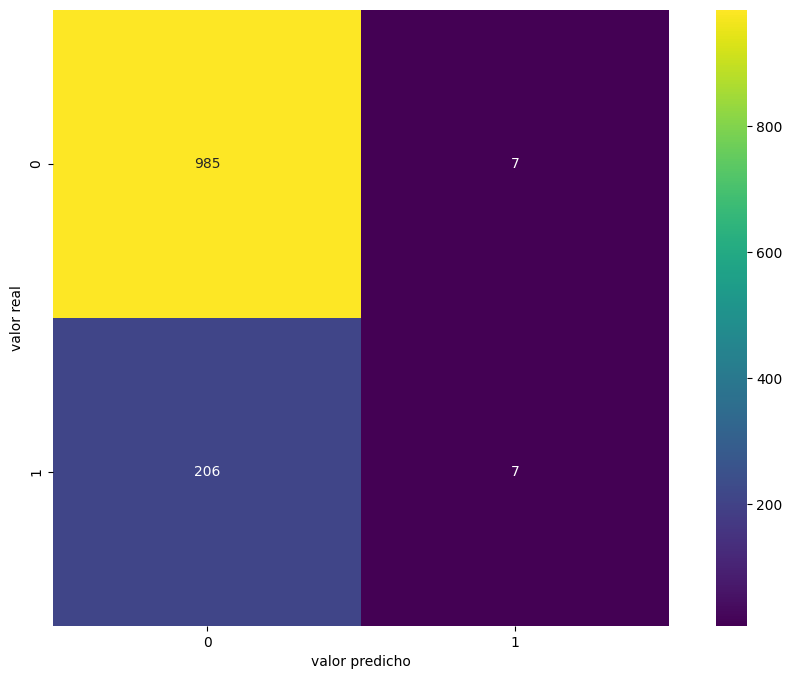

In [351]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [352]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [353]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.823237,0.50000,0.032864,0.061674,0.040759,test,Regresión logistica
1,0.830843,0.46988,0.048148,0.087346,0.057904,train,Regresión logistica
